<a href="https://colab.research.google.com/github/DeepuJose24/DJKeekarikattu/blob/main/CB_EN_R4EEE22003_PT_Lab_Evaluation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary Library files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mtp
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from numpy import random 
from pandas import DataFrame

Loading the Data

In [3]:
df=pd.read_csv("/content/city_day.csv")

Preprocessing the data


In [4]:
df.shape

(29531, 16)

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Removing the duplicate rows if any


In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [13]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
df=df.dropna(axis=0)

In [11]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

Splitting the data 

In [20]:
X= df.drop(['AQI_Bucket','City','Date'],axis=1)
y = df['AQI_Bucket']

In [21]:
X.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0


In [22]:
X.shape

(6236, 13)

**Scaling the data**


In [23]:
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Train and Test Data set**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

**RandomForest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=5000,criterion="entropy", bootstrap=True)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [27]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9959919839679359


In [28]:
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Good       1.00      0.99      1.00       176
    Moderate       1.00      1.00      1.00      1035
        Poor       0.99      0.99      0.99       250
Satisfactory       1.00      1.00      1.00       823
      Severe       1.00      0.89      0.94        56
   Very Poor       0.98      0.99      0.99       155

    accuracy                           1.00      2495
   macro avg       0.99      0.98      0.99      2495
weighted avg       1.00      1.00      1.00      2495

[[ 175    0    0    1    0    0]
 [   0 1035    0    0    0    0]
 [   0    2  248    0    0    0]
 [   0    0    0  823    0    0]
 [   0    1    2    0   50    3]
 [   0    0    1    0    0  154]]


**Creating Bar Plot**

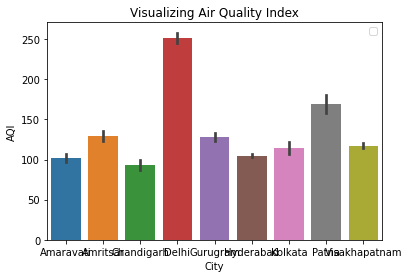

In [58]:
x=df.iloc[:,[0]].values
y=df.iloc[:,[14]].values

sns.barplot(data=df,x='City', y='AQI')
# Add labels to your graph
plt.xlabel('City')
plt.ylabel('AQI')
plt.title("Visualizing Air Quality Index")
plt.legend()
plt.show()

**ADABoost Classifier**

In [32]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=5000,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8372745490981964


In [35]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       176
    Moderate       0.72      1.00      0.84      1035
        Poor       0.00      0.00      0.00       250
Satisfactory       1.00      1.00      1.00       823
      Severe       1.00      0.98      0.99        56
   Very Poor       0.00      0.00      0.00       155

    accuracy                           0.84      2495
   macro avg       0.62      0.66      0.64      2495
weighted avg       0.72      0.84      0.77      2495

[[ 176    0    0    0    0    0]
 [   0 1035    0    0    0    0]
 [   0  250    0    0    0    0]
 [   0    0    0  823    0    0]
 [   0    1    0    0   55    0]
 [   0  155    0    0    0    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**XGBoost Classifier**

In [36]:
import xgboost as Xgb
from sklearn.metrics import mean_squared_error

xgb =Xgb.XGBClassifier()

In [37]:
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

In [38]:
xgb.score(X_train,y_train)

1.0

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [40]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       176
    Moderate       1.00      1.00      1.00      1035
        Poor       1.00      1.00      1.00       250
Satisfactory       1.00      1.00      1.00       823
      Severe       1.00      1.00      1.00        56
   Very Poor       1.00      1.00      1.00       155

    accuracy                           1.00      2495
   macro avg       1.00      1.00      1.00      2495
weighted avg       1.00      1.00      1.00      2495

[[ 176    0    0    0    0    0]
 [   0 1035    0    0    0    0]
 [   0    0  250    0    0    0]
 [   0    0    0  823    0    0]
 [   0    0    0    0   56    0]
 [   0    0    0    0    0  155]]


**Performance Comparison**

The given data set was preprocessed and applied RandomForest Classifier, ADABoost Classifier and XGBoost algorithm to it. The confusion matrix was evaluated.
From the analysis the data set worked well with **XGBoost Classifier with an accuracy of 1** .
RandomForest Classifier got an accuracy of 0.9959 whereas the ADABoost classifier gave an accuracy of 0.83727